### Lab 2 Task 2

Розмір зображення: 640x640, Каналів: 3


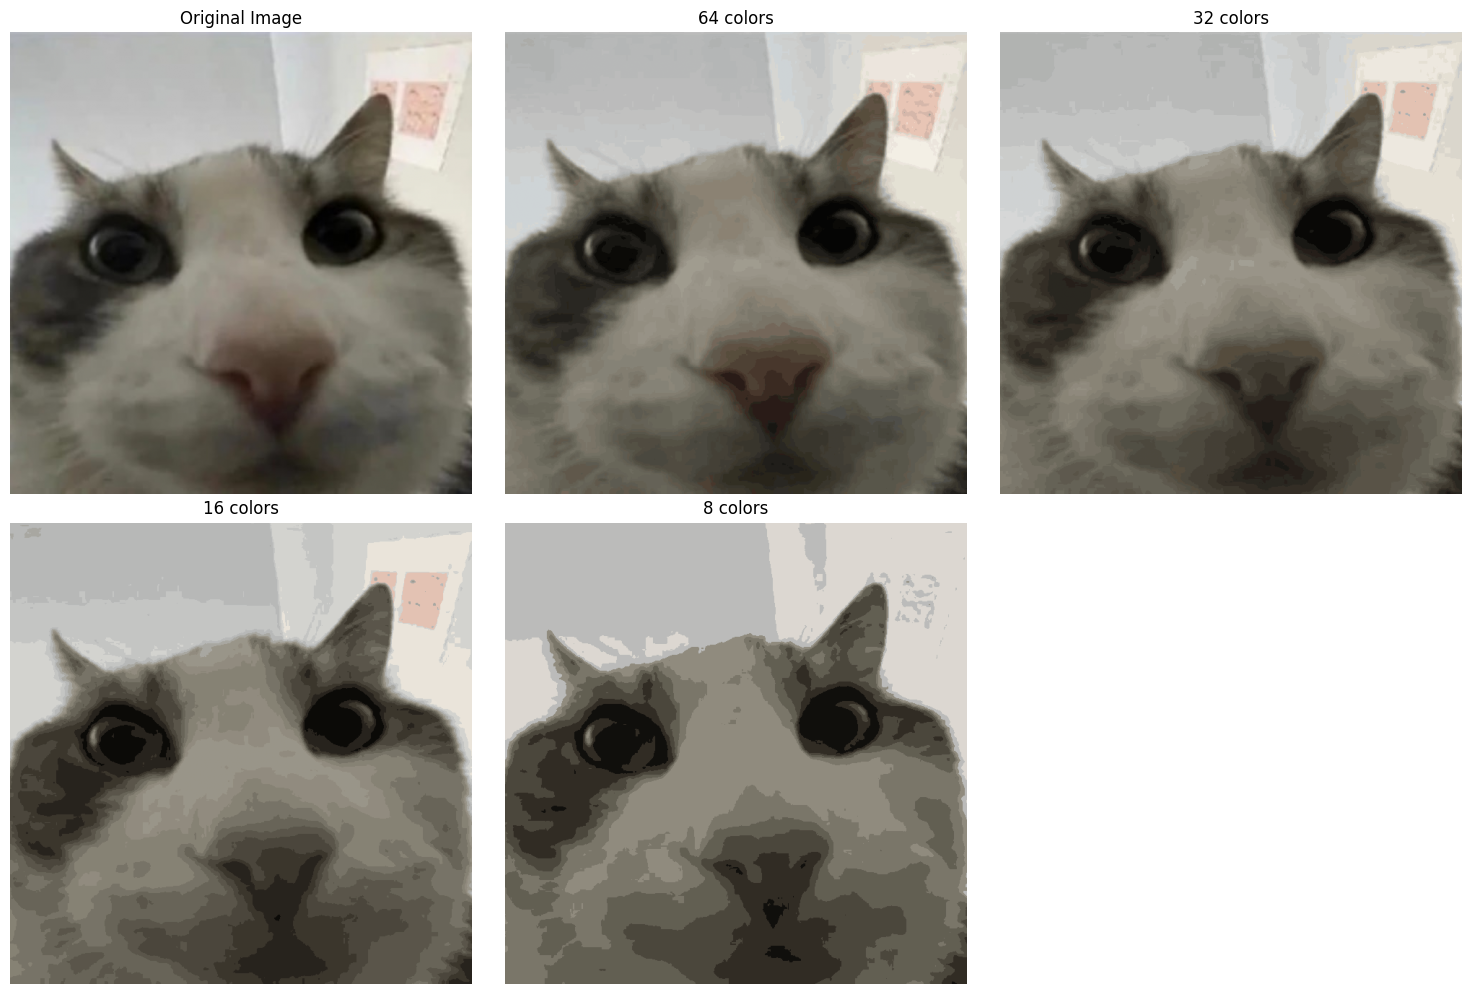

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
import os

img = plt.imread("../src/cat.jpg")
if img.dtype == np.uint8:
    img = np.array(img, dtype=np.float64) / 255
h, w, d = img.shape
print(f"Розмір зображення: {w}x{h}, Каналів: {d}")

image_array = np.reshape(img, (w * h, d))

def recreate_image(codebook, labels, h, w):
    """Відтворює зображення з кодбуку (центроїдів) та міток"""
    d = codebook.shape[1]
    image = np.zeros((h, w, d))
    label_idx = 0
    for i in range(h):
        for j in range(w):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

n_colors_list = [64, 32, 16, 8]
image_array_sample = shuffle(image_array, random_state=0)[:1000]

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(img)

plot_idx = 2

# Квантування за допомогою алгоритму k-means
for n_colors in n_colors_list:
    kmeans = KMeans(n_clusters=n_colors, random_state=0, n_init='auto').fit(image_array_sample)
    labels = kmeans.predict(image_array)
    new_img = recreate_image(kmeans.cluster_centers_, labels, h, w)
    
    plt.subplot(2, 3, plot_idx)
    plt.axis('off')
    plt.title(f'{n_colors} colors')
    plt.imshow(new_img)
    plot_idx += 1

plt.tight_layout()
plt.show()

### Висновок

Результат квантування за допомогою алгоритму k-means видно наочно. При 64 та 32 кольорах візуальна різниця з оригіналом мінімальна — алгоритм добре зберіг основні відтінки.

Однак при зменшенні до 16 і особливо 8 кольорів з'являється сильна постеризація: плавні градієнти зникають, межі між кольорами стають різкими, а фото втрачає деталізацію. 